In [1]:
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

import mxnet as mx
import numpy as np
from mxnet import nd, autograd, gluon


# three customized modules
from labelshift import *
from utils4gluon import *
from data_shift import *
from data import *
from ls_correction import *
import pickle
np.random.seed(112358)

## Experiment 1 -- "Tweak Dirichlet"

In [2]:
dataset_name = 'cifar10' # choices: 'mnist', 'cifar10'
num_labels = 10
results_dict = {}



alpha_range = [100000, 10000,1000,100,10,1,.1,.01,.001]
num_runs = 20

# Tweak train data
tweak_train = True # options include 
p_P = [.1, .1, .1, .1 ,.1 ,.1, .1, .1, .1, .1]

# Tweak test data
tweak_test = True


counter = 0
for alpha in alpha_range:
    for run in range(num_runs):
        
        counter += 1
        print("Experiment: ", counter, "alpha =", alpha, "run =", run)
        p_Q = np.random.dirichlet([alpha]*10)


        # sample data
        num_train_samples = 30000
        num_val_samples = 30000
        num_test_samples = 10000

        # NN config
        num_hidden = 256
        epochs = 10
        batch_size = 1024

        #########################################
        #  Invoke experiment code
        #########################################
        results = correction_experiment(dataset_name=dataset_name, tweak_train=tweak_train, 
                             p_P=p_P, tweak_test=tweak_test, p_Q=p_Q, 
                             num_train_samples=num_train_samples,
                             num_val_samples=num_val_samples,
                             num_test_samples=num_test_samples,
                             num_hidden=num_hidden, 
                             epochs=epochs,
                             batch_size=batch_size)

#         print(results)
        shortname = str(alpha) + "_" + str(run)
        results_dict[shortname] = results


Experiment:  1 alpha = 100000 run = 0
Epoch 0. Loss: 1.8778677114, Train_acc 0.358509, Validation_acc 0.344916
Epoch 1. Loss: 1.71907031133, Train_acc 0.416578, Validation_acc 0.390658
Epoch 2. Loss: 1.61489362916, Train_acc 0.456123, Validation_acc 0.412846
Epoch 3. Loss: 1.53070910952, Train_acc 0.473248, Validation_acc 0.421642
Epoch 4. Loss: 1.46715702485, Train_acc 0.490305, Validation_acc 0.424807
Epoch 5. Loss: 1.40588156812, Train_acc 0.502898, Validation_acc 0.429071
Epoch 6. Loss: 1.35128932276, Train_acc 0.517391, Validation_acc 0.43157
Epoch 7. Loss: 1.29505355294, Train_acc 0.541378, Validation_acc 0.435901
Epoch 8. Loss: 1.24753504726, Train_acc 0.54381, Validation_acc 0.432436
Epoch 9. Loss: 1.18680578771, Train_acc 0.555504, Validation_acc 0.433336
[[ 1.04742803  0.99316406]
 [ 0.91783488  0.96635576]
 [ 0.82500435  0.9904918 ]
 [ 1.43563448  1.0973603 ]
 [ 0.9406724   0.96742349]
 [ 0.90966051  0.96767875]
 [ 0.95127988  0.97535934]
 [ 0.97844142  0.99176107]
 [ 1.0463

Epoch 8. Loss: 1.27902204676, Train_acc 0.529984, Validation_acc 0.432203
Epoch 9. Loss: 1.22433085224, Train_acc 0.558402, Validation_acc 0.439466
Accuracy weighted 0.439453
Experiment:  5 alpha = 100000 run = 4
Epoch 0. Loss: 1.8793181198, Train_acc 0.317264, Validation_acc 0.307403
Epoch 1. Loss: 1.73485662151, Train_acc 0.365272, Validation_acc 0.348947
Epoch 2. Loss: 1.64304791729, Train_acc 0.392158, Validation_acc 0.363939
Epoch 3. Loss: 1.56711636309, Train_acc 0.435468, Validation_acc 0.392191
Epoch 4. Loss: 1.50234533682, Train_acc 0.480844, Validation_acc 0.419276
Epoch 5. Loss: 1.44288424873, Train_acc 0.47588, Validation_acc 0.40685
Epoch 6. Loss: 1.38772057138, Train_acc 0.4995, Validation_acc 0.414479
Epoch 7. Loss: 1.33321035401, Train_acc 0.509128, Validation_acc 0.417844
Epoch 8. Loss: 1.28833465346, Train_acc 0.514526, Validation_acc 0.415778
Epoch 9. Loss: 1.23882078767, Train_acc 0.547708, Validation_acc 0.425107
[[ 0.88795738  0.97076613]
 [ 0.90910646  1.01397206

Epoch 5. Loss: 1.42781058056, Train_acc 0.478245, Validation_acc 0.423108
Epoch 6. Loss: 1.36604487143, Train_acc 0.493304, Validation_acc 0.419343
Epoch 7. Loss: 1.31734472148, Train_acc 0.511061, Validation_acc 0.424041
Epoch 8. Loss: 1.26855091715, Train_acc 0.533715, Validation_acc 0.430637
Epoch 9. Loss: 1.21984411276, Train_acc 0.546808, Validation_acc 0.428571
Accuracy weighted 0.435059
Experiment:  9 alpha = 100000 run = 8
Epoch 0. Loss: 1.89509820966, Train_acc 0.336287, Validation_acc 0.328958
Epoch 1. Loss: 1.73014560324, Train_acc 0.379031, Validation_acc 0.359375
Epoch 2. Loss: 1.63681877213, Train_acc 0.413446, Validation_acc 0.382163
Epoch 3. Loss: 1.56036947915, Train_acc 0.449494, Validation_acc 0.399187
Epoch 4. Loss: 1.49270123584, Train_acc 0.455557, Validation_acc 0.395989
Epoch 5. Loss: 1.43649639791, Train_acc 0.488106, Validation_acc 0.413046
Epoch 6. Loss: 1.38027220541, Train_acc 0.491438, Validation_acc 0.404817
Epoch 7. Loss: 1.32588845889, Train_acc 0.51625

Epoch 2. Loss: 1.59856134951, Train_acc 0.373734, Validation_acc 0.345116
Epoch 3. Loss: 1.52529127254, Train_acc 0.433036, Validation_acc 0.391258
Epoch 4. Loss: 1.4609991253, Train_acc 0.448694, Validation_acc 0.391491
Epoch 5. Loss: 1.40171856733, Train_acc 0.472015, Validation_acc 0.40545
Epoch 6. Loss: 1.35105307401, Train_acc 0.492204, Validation_acc 0.411614
Epoch 7. Loss: 1.29784213591, Train_acc 0.497968, Validation_acc 0.413346
Epoch 8. Loss: 1.2555045947, Train_acc 0.523821, Validation_acc 0.42434
Epoch 9. Loss: 1.20203251404, Train_acc 0.524853, Validation_acc 0.416045
Accuracy weighted 0.423926
Experiment:  13 alpha = 100000 run = 12
Epoch 0. Loss: 1.88984297482, Train_acc 0.326159, Validation_acc 0.318164
Epoch 1. Loss: 1.73866102661, Train_acc 0.364406, Validation_acc 0.351479
Epoch 2. Loss: 1.64174645366, Train_acc 0.406117, Validation_acc 0.380697
Epoch 3. Loss: 1.56643699296, Train_acc 0.433535, Validation_acc 0.393423
Epoch 4. Loss: 1.50288509392, Train_acc 0.467717,

Epoch 0. Loss: 1.89193554458, Train_acc 0.308336, Validation_acc 0.300806
Epoch 1. Loss: 1.73611707015, Train_acc 0.362007, Validation_acc 0.345283
Epoch 2. Loss: 1.64256507303, Train_acc 0.403385, Validation_acc 0.378598
Epoch 3. Loss: 1.56617632326, Train_acc 0.428771, Validation_acc 0.391091
Epoch 4. Loss: 1.49718913973, Train_acc 0.471115, Validation_acc 0.41328
Epoch 5. Loss: 1.44319958643, Train_acc 0.483009, Validation_acc 0.416278
Epoch 6. Loss: 1.38818228269, Train_acc 0.514093, Validation_acc 0.432336
Epoch 7. Loss: 1.33813588264, Train_acc 0.53115, Validation_acc 0.435401
Epoch 8. Loss: 1.2833776407, Train_acc 0.534915, Validation_acc 0.436167
Epoch 9. Loss: 1.23294121364, Train_acc 0.559502, Validation_acc 0.439499
Accuracy weighted 0.44375
Experiment:  17 alpha = 100000 run = 16
Epoch 0. Loss: 1.87867875669, Train_acc 0.314266, Validation_acc 0.303738
Epoch 1. Loss: 1.72475906362, Train_acc 0.371602, Validation_acc 0.350913
Epoch 2. Loss: 1.62738530064, Train_acc 0.408449,

Epoch 0. Loss: 1.87996196732, Train_acc 0.32576, Validation_acc 0.316731
Epoch 1. Loss: 1.72943019601, Train_acc 0.360508, Validation_acc 0.336587
Epoch 2. Loss: 1.64278437197, Train_acc 0.388459, Validation_acc 0.359741
Epoch 3. Loss: 1.57118868229, Train_acc 0.428172, Validation_acc 0.386094
Epoch 4. Loss: 1.50768810908, Train_acc 0.456457, Validation_acc 0.402019
Epoch 5. Loss: 1.44453592014, Train_acc 0.486207, Validation_acc 0.41891
Epoch 6. Loss: 1.38911310961, Train_acc 0.513226, Validation_acc 0.427805
Epoch 7. Loss: 1.33013830262, Train_acc 0.538346, Validation_acc 0.441598
Epoch 8. Loss: 1.27654164239, Train_acc 0.555903, Validation_acc 0.444063
Epoch 9. Loss: 1.22974511884, Train_acc 0.573094, Validation_acc 0.44303
Accuracy weighted 0.446191
Experiment:  21 alpha = 10000 run = 0
Epoch 0. Loss: 1.87050432562, Train_acc 0.35601, Validation_acc 0.334588
Epoch 1. Loss: 1.71218473608, Train_acc 0.411214, Validation_acc 0.376533
Epoch 2. Loss: 1.61551387484, Train_acc 0.447828, V

Epoch 0. Loss: 1.89256059335, Train_acc 0.334721, Validation_acc 0.313366
Epoch 1. Loss: 1.73840214802, Train_acc 0.383662, Validation_acc 0.350546
Epoch 2. Loss: 1.64560931618, Train_acc 0.434368, Validation_acc 0.390625
Epoch 3. Loss: 1.56957071553, Train_acc 0.460588, Validation_acc 0.408149
Epoch 4. Loss: 1.50723578944, Train_acc 0.497335, Validation_acc 0.43157
Epoch 5. Loss: 1.44739547707, Train_acc 0.518757, Validation_acc 0.437367
Epoch 6. Loss: 1.38977916358, Train_acc 0.538313, Validation_acc 0.445163
Epoch 7. Loss: 1.34592581321, Train_acc 0.543577, Validation_acc 0.438833
Epoch 8. Loss: 1.28905476876, Train_acc 0.558835, Validation_acc 0.442864
Epoch 9. Loss: 1.23222787482, Train_acc 0.576892, Validation_acc 0.449194
Accuracy weighted 0.45459
Experiment:  25 alpha = 10000 run = 4
Epoch 0. Loss: 1.89208095561, Train_acc 0.300373, Validation_acc 0.291711
Epoch 1. Loss: 1.73799013997, Train_acc 0.296309, Validation_acc 0.278785
Epoch 2. Loss: 1.64085239394, Train_acc 0.361141,

Epoch 0. Loss: 1.87912289988, Train_acc 0.296642, Validation_acc 0.283915
Epoch 1. Loss: 1.71520922888, Train_acc 0.358209, Validation_acc 0.335954
Epoch 2. Loss: 1.62787636635, Train_acc 0.381896, Validation_acc 0.35591
Epoch 3. Loss: 1.56016237547, Train_acc 0.357076, Validation_acc 0.329857
Epoch 4. Loss: 1.49644762674, Train_acc 0.397854, Validation_acc 0.360075
Epoch 5. Loss: 1.43848441543, Train_acc 0.390125, Validation_acc 0.353012
Epoch 6. Loss: 1.38644176633, Train_acc 0.423641, Validation_acc 0.370836
Epoch 7. Loss: 1.32600433689, Train_acc 0.492804, Validation_acc 0.417211
Epoch 8. Loss: 1.28780708311, Train_acc 0.465285, Validation_acc 0.393257
Epoch 9. Loss: 1.23854098145, Train_acc 0.516491, Validation_acc 0.423774
Accuracy weighted 0.430176
Experiment:  29 alpha = 10000 run = 8
Epoch 0. Loss: 1.89655942741, Train_acc 0.360608, Validation_acc 0.350646
Epoch 1. Loss: 1.74946319942, Train_acc 0.421175, Validation_acc 0.394789
Epoch 2. Loss: 1.66060501914, Train_acc 0.45559,

Epoch 0. Loss: 1.86756944635, Train_acc 0.33079, Validation_acc 0.33129
Epoch 1. Loss: 1.7242888826, Train_acc 0.380331, Validation_acc 0.362573
Epoch 2. Loss: 1.63197737482, Train_acc 0.425706, Validation_acc 0.397621
Epoch 3. Loss: 1.56623928513, Train_acc 0.433236, Validation_acc 0.398487
Epoch 4. Loss: 1.50064982926, Train_acc 0.468617, Validation_acc 0.421842
Epoch 5. Loss: 1.44141781306, Train_acc 0.496235, Validation_acc 0.432136
Epoch 6. Loss: 1.38483419127, Train_acc 0.512793, Validation_acc 0.435168
Epoch 7. Loss: 1.33539793506, Train_acc 0.536547, Validation_acc 0.445696
Epoch 8. Loss: 1.29436830948, Train_acc 0.548574, Validation_acc 0.447695
Epoch 9. Loss: 1.24248007731, Train_acc 0.558302, Validation_acc 0.441998
Accuracy weighted 0.45498
Experiment:  33 alpha = 10000 run = 12
Epoch 0. Loss: 1.89019203473, Train_acc 0.371802, Validation_acc 0.374833
Epoch 1. Loss: 1.73657899226, Train_acc 0.413813, Validation_acc 0.404518
Epoch 2. Loss: 1.64495422481, Train_acc 0.430437, 

Epoch 0. Loss: 1.8674203888, Train_acc 0.361041, Validation_acc 0.354877
Epoch 1. Loss: 1.7219469779, Train_acc 0.408016, Validation_acc 0.390525
Epoch 2. Loss: 1.62690078895, Train_acc 0.4366, Validation_acc 0.404218
Epoch 3. Loss: 1.55847055279, Train_acc 0.460554, Validation_acc 0.419843
Epoch 4. Loss: 1.48968806086, Train_acc 0.485008, Validation_acc 0.427672
Epoch 5. Loss: 1.42620499038, Train_acc 0.495069, Validation_acc 0.428505
Epoch 6. Loss: 1.36825479791, Train_acc 0.530217, Validation_acc 0.442864
Epoch 7. Loss: 1.31582192034, Train_acc 0.537413, Validation_acc 0.440132
Epoch 8. Loss: 1.2599624278, Train_acc 0.559502, Validation_acc 0.447128
Epoch 9. Loss: 1.20866550567, Train_acc 0.584188, Validation_acc 0.455624
Accuracy weighted 0.45791
Experiment:  37 alpha = 10000 run = 16
Epoch 0. Loss: 1.86905070169, Train_acc 0.349081, Validation_acc 0.333855
Epoch 1. Loss: 1.71360496266, Train_acc 0.352112, Validation_acc 0.33682
Epoch 2. Loss: 1.62532221663, Train_acc 0.389692, Val

Epoch 0. Loss: 1.87202776662, Train_acc 0.306703, Validation_acc 0.296209
Epoch 1. Loss: 1.71181627821, Train_acc 0.345882, Validation_acc 0.334322
Epoch 2. Loss: 1.61449892727, Train_acc 0.368803, Validation_acc 0.353245
Epoch 3. Loss: 1.53606631616, Train_acc 0.393423, Validation_acc 0.36787
Epoch 4. Loss: 1.47479317792, Train_acc 0.430337, Validation_acc 0.38826
Epoch 5. Loss: 1.41952081817, Train_acc 0.44926, Validation_acc 0.397588
Epoch 6. Loss: 1.3717816687, Train_acc 0.478178, Validation_acc 0.417777
Epoch 7. Loss: 1.31971457907, Train_acc 0.492637, Validation_acc 0.418144
Epoch 8. Loss: 1.27708421416, Train_acc 0.500233, Validation_acc 0.417377
Epoch 9. Loss: 1.22626919533, Train_acc 0.528252, Validation_acc 0.434268
Accuracy weighted 0.43418
Experiment:  41 alpha = 1000 run = 0
Epoch 0. Loss: 1.89687848449, Train_acc 0.372068, Validation_acc 0.363973
Epoch 1. Loss: 1.7413832664, Train_acc 0.399054, Validation_acc 0.380797
Epoch 2. Loss: 1.65275144419, Train_acc 0.442264, Vali

Epoch 0. Loss: 1.84222938735, Train_acc 0.333122, Validation_acc 0.316298
Epoch 1. Loss: 1.68751387086, Train_acc 0.372868, Validation_acc 0.354777
Epoch 2. Loss: 1.59516865904, Train_acc 0.397788, Validation_acc 0.368004
Epoch 3. Loss: 1.51795416356, Train_acc 0.42444, Validation_acc 0.383962
Epoch 4. Loss: 1.45795602989, Train_acc 0.445362, Validation_acc 0.390525
Epoch 5. Loss: 1.40373540382, Train_acc 0.466784, Validation_acc 0.403052
Epoch 6. Loss: 1.34769161764, Train_acc 0.470349, Validation_acc 0.396988
Epoch 7. Loss: 1.3014232467, Train_acc 0.50653, Validation_acc 0.420342
Epoch 8. Loss: 1.25485309844, Train_acc 0.524487, Validation_acc 0.422608
Epoch 9. Loss: 1.20599618994, Train_acc 0.546742, Validation_acc 0.433369
Accuracy weighted 0.439746
Experiment:  45 alpha = 1000 run = 4
Epoch 0. Loss: 1.87585656772, Train_acc 0.342051, Validation_acc 0.334388
Epoch 1. Loss: 1.72815750166, Train_acc 0.38736, Validation_acc 0.361041
Epoch 2. Loss: 1.63928372428, Train_acc 0.427106, Va

Epoch 0. Loss: 1.82444458297, Train_acc 0.318164, Validation_acc 0.309801
Epoch 1. Loss: 1.68065392375, Train_acc 0.387493, Validation_acc 0.371135
Epoch 2. Loss: 1.58913676099, Train_acc 0.411914, Validation_acc 0.385428
Epoch 3. Loss: 1.517685801, Train_acc 0.430937, Validation_acc 0.394456
Epoch 4. Loss: 1.46591575609, Train_acc 0.454558, Validation_acc 0.407416
Epoch 5. Loss: 1.39215970197, Train_acc 0.48834, Validation_acc 0.423974
Epoch 6. Loss: 1.34417626547, Train_acc 0.496702, Validation_acc 0.422375
Epoch 7. Loss: 1.29243158058, Train_acc 0.516358, Validation_acc 0.429504
Epoch 8. Loss: 1.24961807914, Train_acc 0.540145, Validation_acc 0.439699
Epoch 9. Loss: 1.19694991366, Train_acc 0.552505, Validation_acc 0.4369
Accuracy weighted 0.44707
Experiment:  49 alpha = 1000 run = 8
Epoch 0. Loss: 1.90262247959, Train_acc 0.347315, Validation_acc 0.322328
Epoch 1. Loss: 1.75853436091, Train_acc 0.384228, Validation_acc 0.354111
Epoch 2. Loss: 1.65946313397, Train_acc 0.418677, Vali

Epoch 0. Loss: 1.87253893297, Train_acc 0.342517, Validation_acc 0.329458
Epoch 1. Loss: 1.72204455999, Train_acc 0.383129, Validation_acc 0.360808
Epoch 2. Loss: 1.63146077817, Train_acc 0.377832, Validation_acc 0.348747
Epoch 3. Loss: 1.56191418442, Train_acc 0.4371, Validation_acc 0.393557
Epoch 4. Loss: 1.49824794911, Train_acc 0.456856, Validation_acc 0.404351
Epoch 5. Loss: 1.43298131852, Train_acc 0.483842, Validation_acc 0.419643
Epoch 6. Loss: 1.38205191522, Train_acc 0.489472, Validation_acc 0.411014
Epoch 7. Loss: 1.3276544101, Train_acc 0.482543, Validation_acc 0.398687
Epoch 8. Loss: 1.27766625703, Train_acc 0.521389, Validation_acc 0.424407
Epoch 9. Loss: 1.23182806708, Train_acc 0.580324, Validation_acc 0.460055
Accuracy weighted 0.45957
Experiment:  53 alpha = 1000 run = 12
Epoch 0. Loss: 1.89724612503, Train_acc 0.358842, Validation_acc 0.341285
Epoch 1. Loss: 1.73051504137, Train_acc 0.406117, Validation_acc 0.38103
Epoch 2. Loss: 1.6360534368, Train_acc 0.435668, Val

Epoch 0. Loss: 1.8157511544, Train_acc 0.35561, Validation_acc 0.342384
Epoch 1. Loss: 1.66352885815, Train_acc 0.383695, Validation_acc 0.367404
Epoch 2. Loss: 1.56744297917, Train_acc 0.393557, Validation_acc 0.365305
Epoch 3. Loss: 1.49271778129, Train_acc 0.414046, Validation_acc 0.375966
Epoch 4. Loss: 1.421342074, Train_acc 0.427539, Validation_acc 0.380064
Epoch 5. Loss: 1.3712661923, Train_acc 0.44293, Validation_acc 0.384062
Epoch 6. Loss: 1.29183030289, Train_acc 0.448661, Validation_acc 0.380864
Epoch 7. Loss: 1.24295019365, Train_acc 0.458489, Validation_acc 0.384328
Epoch 8. Loss: 1.19127545941, Train_acc 0.483076, Validation_acc 0.40022
Epoch 9. Loss: 1.13332303369, Train_acc 0.491438, Validation_acc 0.395622
Accuracy weighted 0.402832
Experiment:  57 alpha = 1000 run = 16
Epoch 0. Loss: 1.89558476911, Train_acc 0.310135, Validation_acc 0.304304
Epoch 1. Loss: 1.73764018074, Train_acc 0.3741, Validation_acc 0.35531
Epoch 2. Loss: 1.64497338093, Train_acc 0.40072, Validati

Epoch 0. Loss: 1.86041079534, Train_acc 0.370402, Validation_acc 0.358909
Epoch 1. Loss: 1.70605190231, Train_acc 0.403218, Validation_acc 0.376566
Epoch 2. Loss: 1.61407177841, Train_acc 0.431836, Validation_acc 0.397055
Epoch 3. Loss: 1.54094736183, Train_acc 0.450093, Validation_acc 0.407849
Epoch 4. Loss: 1.48197015042, Train_acc 0.473048, Validation_acc 0.420609
Epoch 5. Loss: 1.41930597004, Train_acc 0.498601, Validation_acc 0.434602
Epoch 6. Loss: 1.36487007448, Train_acc 0.498134, Validation_acc 0.428705
Epoch 7. Loss: 1.30891217367, Train_acc 0.519623, Validation_acc 0.433569
Epoch 8. Loss: 1.26533480507, Train_acc 0.515092, Validation_acc 0.424673
Epoch 9. Loss: 1.2075351184, Train_acc 0.551706, Validation_acc 0.442297
Accuracy weighted 0.458398
Experiment:  61 alpha = 100 run = 0
Epoch 0. Loss: 1.8932565022, Train_acc 0.36827, Validation_acc 0.359508
Epoch 1. Loss: 1.73562419042, Train_acc 0.41941, Validation_acc 0.397821
Epoch 2. Loss: 1.64159000534, Train_acc 0.448461, Val

Epoch 0. Loss: 1.83017834433, Train_acc 0.298341, Validation_acc 0.291045
Epoch 1. Loss: 1.6762823698, Train_acc 0.335754, Validation_acc 0.321895
Epoch 2. Loss: 1.58675978346, Train_acc 0.359841, Validation_acc 0.336387
Epoch 3. Loss: 1.51133371364, Train_acc 0.378498, Validation_acc 0.347581
Epoch 4. Loss: 1.44713758585, Train_acc 0.400053, Validation_acc 0.363506
Epoch 5. Loss: 1.39836371471, Train_acc 0.414479, Validation_acc 0.366638
Epoch 6. Loss: 1.33287637593, Train_acc 0.444663, Validation_acc 0.382363
Epoch 7. Loss: 1.27898534077, Train_acc 0.460288, Validation_acc 0.38776
Epoch 8. Loss: 1.22281343585, Train_acc 0.423641, Validation_acc 0.355477
Epoch 9. Loss: 1.17898607247, Train_acc 0.472348, Validation_acc 0.384062
Accuracy weighted 0.39375
Experiment:  65 alpha = 100 run = 4
Epoch 0. Loss: 1.88756579091, Train_acc 0.360941, Validation_acc 0.343184
Epoch 1. Loss: 1.72645494485, Train_acc 0.425173, Validation_acc 0.395522
Epoch 2. Loss: 1.63100373607, Train_acc 0.435268, Va

Epoch 0. Loss: 1.87018155305, Train_acc 0.268057, Validation_acc 0.262827
Epoch 1. Loss: 1.71714949971, Train_acc 0.326459, Validation_acc 0.316531
Epoch 2. Loss: 1.61805317381, Train_acc 0.366771, Validation_acc 0.342517
Epoch 3. Loss: 1.54024628051, Train_acc 0.418777, Validation_acc 0.382063
Epoch 4. Loss: 1.47543444268, Train_acc 0.437, Validation_acc 0.390092
Epoch 5. Loss: 1.41017611359, Train_acc 0.448661, Validation_acc 0.397388
Epoch 6. Loss: 1.36104269837, Train_acc 0.472715, Validation_acc 0.405584
Epoch 7. Loss: 1.30919137843, Train_acc 0.460688, Validation_acc 0.389759
Epoch 8. Loss: 1.2524692058, Train_acc 0.454491, Validation_acc 0.379198
Epoch 9. Loss: 1.20388998981, Train_acc 0.522688, Validation_acc 0.421309
Accuracy weighted 0.420117
Experiment:  69 alpha = 100 run = 8
Epoch 0. Loss: 1.88458982891, Train_acc 0.285081, Validation_acc 0.273621
Epoch 1. Loss: 1.73098087515, Train_acc 0.328691, Validation_acc 0.304404
Epoch 2. Loss: 1.636299924, Train_acc 0.38063, Valida

Epoch 0. Loss: 1.886160139, Train_acc 0.322028, Validation_acc 0.313566
Epoch 1. Loss: 1.73062667768, Train_acc 0.401319, Validation_acc 0.378598
Epoch 2. Loss: 1.64244315805, Train_acc 0.431836, Validation_acc 0.398854
Epoch 3. Loss: 1.56455438053, Train_acc 0.432003, Validation_acc 0.397521
Epoch 4. Loss: 1.50211411691, Train_acc 0.448294, Validation_acc 0.397421
Epoch 5. Loss: 1.44533446443, Train_acc 0.484009, Validation_acc 0.41901
Epoch 6. Loss: 1.38787867886, Train_acc 0.497901, Validation_acc 0.419476
Epoch 7. Loss: 1.34091510762, Train_acc 0.491838, Validation_acc 0.398921
Epoch 8. Loss: 1.29836842695, Train_acc 0.497668, Validation_acc 0.40042
Epoch 9. Loss: 1.25114721711, Train_acc 0.556303, Validation_acc 0.432336
Accuracy weighted 0.437402
Experiment:  73 alpha = 100 run = 12
Epoch 0. Loss: 1.88586896011, Train_acc 0.317264, Validation_acc 0.307136
Epoch 1. Loss: 1.73622004615, Train_acc 0.384895, Validation_acc 0.370935
Epoch 2. Loss: 1.64437510254, Train_acc 0.427172, Va

Epoch 0. Loss: 1.88092211104, Train_acc 0.314599, Validation_acc 0.311067
Epoch 1. Loss: 1.72691572983, Train_acc 0.355011, Validation_acc 0.33812
Epoch 2. Loss: 1.62980069083, Train_acc 0.372002, Validation_acc 0.346548
Epoch 3. Loss: 1.55302632337, Train_acc 0.423274, Validation_acc 0.384995
Epoch 4. Loss: 1.49394730864, Train_acc 0.448961, Validation_acc 0.401619
Epoch 5. Loss: 1.43371976177, Train_acc 0.469116, Validation_acc 0.409282
Epoch 6. Loss: 1.38118859094, Train_acc 0.499001, Validation_acc 0.425706
Epoch 7. Loss: 1.32530573771, Train_acc 0.501099, Validation_acc 0.413446
Epoch 8. Loss: 1.27097927323, Train_acc 0.516358, Validation_acc 0.415512
Epoch 9. Loss: 1.21432006827, Train_acc 0.535348, Validation_acc 0.417611
Accuracy weighted 0.410547
Experiment:  77 alpha = 100 run = 16
Epoch 0. Loss: 1.90250456434, Train_acc 0.337487, Validation_acc 0.325526
Epoch 1. Loss: 1.74780135877, Train_acc 0.390925, Validation_acc 0.367471
Epoch 2. Loss: 1.65291937212, Train_acc 0.41861, 

Epoch 0. Loss: 1.86798037922, Train_acc 0.332523, Validation_acc 0.328625
Epoch 1. Loss: 1.714082308, Train_acc 0.377898, Validation_acc 0.365338
Epoch 2. Loss: 1.61775772684, Train_acc 0.422908, Validation_acc 0.396055
Epoch 3. Loss: 1.54536122518, Train_acc 0.448461, Validation_acc 0.407816
Epoch 4. Loss: 1.47870634102, Train_acc 0.46272, Validation_acc 0.415812
Epoch 5. Loss: 1.42503755387, Train_acc 0.487473, Validation_acc 0.427405
Epoch 6. Loss: 1.3704083144, Train_acc 0.493337, Validation_acc 0.420876
Epoch 7. Loss: 1.32334911233, Train_acc 0.484642, Validation_acc 0.416411
Epoch 8. Loss: 1.27695087113, Train_acc 0.515925, Validation_acc 0.43097
Epoch 9. Loss: 1.22804295078, Train_acc 0.517357, Validation_acc 0.42464
Accuracy weighted 0.432129
Experiment:  81 alpha = 10 run = 0
Epoch 0. Loss: 1.8965513451, Train_acc 0.345349, Validation_acc 0.336287
Epoch 1. Loss: 1.74389926495, Train_acc 0.415445, Validation_acc 0.386727
Epoch 2. Loss: 1.65636433355, Train_acc 0.433935, Validat

Epoch 0. Loss: 1.87237014957, Train_acc 0.332023, Validation_acc 0.324594
Epoch 1. Loss: 1.72850710972, Train_acc 0.38706, Validation_acc 0.366305
Epoch 2. Loss: 1.63567672678, Train_acc 0.393523, Validation_acc 0.363273
Epoch 3. Loss: 1.57026897006, Train_acc 0.428272, Validation_acc 0.38696
Epoch 4. Loss: 1.507679036, Train_acc 0.435734, Validation_acc 0.382163
Epoch 5. Loss: 1.44876280225, Train_acc 0.466085, Validation_acc 0.401852
Epoch 6. Loss: 1.3994918915, Train_acc 0.484508, Validation_acc 0.408815
Epoch 7. Loss: 1.34825473912, Train_acc 0.496069, Validation_acc 0.407683
Epoch 8. Loss: 1.2996230699, Train_acc 0.530351, Validation_acc 0.423374
Epoch 9. Loss: 1.25262815958, Train_acc 0.538513, Validation_acc 0.42424
Accuracy weighted 0.434473
Experiment:  85 alpha = 10 run = 4
Epoch 0. Loss: 1.8951346824, Train_acc 0.339319, Validation_acc 0.322894
Epoch 1. Loss: 1.73902891613, Train_acc 0.383995, Validation_acc 0.361574
Epoch 2. Loss: 1.65528114588, Train_acc 0.41238, Validatio

Epoch 0. Loss: 1.84001737641, Train_acc 0.315598, Validation_acc 0.308502
Epoch 1. Loss: 1.69012283817, Train_acc 0.363939, Validation_acc 0.345682
Epoch 2. Loss: 1.60232198524, Train_acc 0.399187, Validation_acc 0.373467
Epoch 3. Loss: 1.53121056898, Train_acc 0.423874, Validation_acc 0.392124
Epoch 4. Loss: 1.46637532959, Train_acc 0.438433, Validation_acc 0.39289
Epoch 5. Loss: 1.4116508069, Train_acc 0.461587, Validation_acc 0.409082
Epoch 6. Loss: 1.35521663952, Train_acc 0.478278, Validation_acc 0.413713
Epoch 7. Loss: 1.30451741211, Train_acc 0.496735, Validation_acc 0.416944
Epoch 8. Loss: 1.25260829315, Train_acc 0.518557, Validation_acc 0.421875
Epoch 9. Loss: 1.20362392394, Train_acc 0.518957, Validation_acc 0.41238
Accuracy weighted 0.432129
Experiment:  89 alpha = 10 run = 8
Epoch 0. Loss: 1.88557429911, Train_acc 0.352512, Validation_acc 0.341418
Epoch 1. Loss: 1.73400329293, Train_acc 0.39409, Validation_acc 0.372335
Epoch 2. Loss: 1.64108872101, Train_acc 0.426139, Vali

Epoch 0. Loss: 1.85433092299, Train_acc 0.296442, Validation_acc 0.282516
Epoch 1. Loss: 1.68228002664, Train_acc 0.337653, Validation_acc 0.314432
Epoch 2. Loss: 1.58093506469, Train_acc 0.38053, Validation_acc 0.348414
Epoch 3. Loss: 1.50230686732, Train_acc 0.425173, Validation_acc 0.386694
Epoch 4. Loss: 1.43927390734, Train_acc 0.405384, Validation_acc 0.360175
Epoch 5. Loss: 1.38771750102, Train_acc 0.452325, Validation_acc 0.396788
Epoch 6. Loss: 1.33257533658, Train_acc 0.430137, Validation_acc 0.373334
Epoch 7. Loss: 1.28793250746, Train_acc 0.455624, Validation_acc 0.38766
Epoch 8. Loss: 1.22931912421, Train_acc 0.491271, Validation_acc 0.407716
Epoch 9. Loss: 1.18652661341, Train_acc 0.498867, Validation_acc 0.405251
Accuracy weighted 0.463379
Experiment:  93 alpha = 10 run = 12
Epoch 0. Loss: 1.9000182609, Train_acc 0.352146, Validation_acc 0.334988
Epoch 1. Loss: 1.73968963554, Train_acc 0.407083, Validation_acc 0.371502
Epoch 2. Loss: 1.64918661351, Train_acc 0.423174, Va

Epoch 0. Loss: 1.85220269595, Train_acc 0.291478, Validation_acc 0.283316
Epoch 1. Loss: 1.70718896199, Train_acc 0.343284, Validation_acc 0.327925
Epoch 2. Loss: 1.61950942322, Train_acc 0.3754, Validation_acc 0.353778
Epoch 3. Loss: 1.541956871, Train_acc 0.376533, Validation_acc 0.345016
Epoch 4. Loss: 1.48090813539, Train_acc 0.425473, Validation_acc 0.378865
Epoch 5. Loss: 1.42431252914, Train_acc 0.460888, Validation_acc 0.403352
Epoch 6. Loss: 1.37260610588, Train_acc 0.480577, Validation_acc 0.405517
Epoch 7. Loss: 1.31870047652, Train_acc 0.485908, Validation_acc 0.403485
Epoch 8. Loss: 1.27226062959, Train_acc 0.513693, Validation_acc 0.416278
Epoch 9. Loss: 1.23035954738, Train_acc 0.510428, Validation_acc 0.403085
Accuracy weighted 0.456348
Experiment:  97 alpha = 10 run = 16
Epoch 0. Loss: 1.87637654047, Train_acc 0.352212, Validation_acc 0.339452
Epoch 1. Loss: 1.72006606637, Train_acc 0.389426, Validation_acc 0.371469
Epoch 2. Loss: 1.6272990261, Train_acc 0.418543, Vali

Epoch 0. Loss: 1.85221034529, Train_acc 0.332323, Validation_acc 0.319829
Epoch 1. Loss: 1.69719988093, Train_acc 0.365139, Validation_acc 0.344749
Epoch 2. Loss: 1.60496728455, Train_acc 0.383829, Validation_acc 0.36324
Epoch 3. Loss: 1.53018879134, Train_acc 0.42444, Validation_acc 0.388993
Epoch 4. Loss: 1.47227699187, Train_acc 0.445796, Validation_acc 0.398587
Epoch 5. Loss: 1.41640876886, Train_acc 0.458256, Validation_acc 0.400653
Epoch 6. Loss: 1.36760387403, Train_acc 0.457823, Validation_acc 0.396955
Epoch 7. Loss: 1.31392633351, Train_acc 0.483942, Validation_acc 0.404384
Epoch 8. Loss: 1.26774152666, Train_acc 0.496335, Validation_acc 0.41178
Epoch 9. Loss: 1.21709914788, Train_acc 0.509162, Validation_acc 0.412347
Accuracy weighted 0.44043
Experiment:  101 alpha = 1 run = 0
Epoch 0. Loss: 1.90463340638, Train_acc 0.302505, Validation_acc 0.299041
Epoch 1. Loss: 1.74972153255, Train_acc 0.38173, Validation_acc 0.369836
Epoch 2. Loss: 1.65188017097, Train_acc 0.42494, Valida

Epoch 0. Loss: 1.64364612546, Train_acc 0.22528, Validation_acc 0.217484
Epoch 1. Loss: 1.46751791875, Train_acc 0.291711, Validation_acc 0.274187
Epoch 2. Loss: 1.37769820552, Train_acc 0.291211, Validation_acc 0.269023
Epoch 3. Loss: 1.31107742607, Train_acc 0.319296, Validation_acc 0.287247
Epoch 4. Loss: 1.2632187087, Train_acc 0.348547, Validation_acc 0.311367
Epoch 5. Loss: 1.22358369266, Train_acc 0.370436, Validation_acc 0.328558
Epoch 6. Loss: 1.16565797631, Train_acc 0.372401, Validation_acc 0.326959
Epoch 7. Loss: 1.13596056733, Train_acc 0.395389, Validation_acc 0.336954
Epoch 8. Loss: 1.06975038748, Train_acc 0.41248, Validation_acc 0.346182
Epoch 9. Loss: 1.11919627746, Train_acc 0.419976, Validation_acc 0.349747
Accuracy weighted 0.52334
Experiment:  105 alpha = 1 run = 4
Epoch 0. Loss: 1.8774328862, Train_acc 0.341851, Validation_acc 0.329124
Epoch 1. Loss: 1.71701358173, Train_acc 0.402785, Validation_acc 0.374234
Epoch 2. Loss: 1.62618345045, Train_acc 0.435468, Valid

Epoch 0. Loss: 1.63410016921, Train_acc 0.286014, Validation_acc 0.276019
Epoch 1. Loss: 1.48426980423, Train_acc 0.358209, Validation_acc 0.334921
Epoch 2. Loss: 1.39621735207, Train_acc 0.383962, Validation_acc 0.359075
Epoch 3. Loss: 1.32885171621, Train_acc 0.40535, Validation_acc 0.369503
Epoch 4. Loss: 1.26968766848, Train_acc 0.414379, Validation_acc 0.375366
Epoch 5. Loss: 1.22034345659, Train_acc 0.434368, Validation_acc 0.389159
Epoch 6. Loss: 1.17425794755, Train_acc 0.45026, Validation_acc 0.394423
Epoch 7. Loss: 1.12398626055, Train_acc 0.453491, Validation_acc 0.393557
Epoch 8. Loss: 1.08236354311, Train_acc 0.466451, Validation_acc 0.395789
Epoch 9. Loss: 1.05076519992, Train_acc 0.487307, Validation_acc 0.408682
Accuracy weighted 0.544434
Experiment:  109 alpha = 1 run = 8
Epoch 0. Loss: 1.90589098151, Train_acc 0.340985, Validation_acc 0.333689
Epoch 1. Loss: 1.73885390762, Train_acc 0.398921, Validation_acc 0.377665
Epoch 2. Loss: 1.63700157958, Train_acc 0.423607, Va

Epoch 0. Loss: 1.64736828742, Train_acc 0.205757, Validation_acc 0.197128
Epoch 1. Loss: 1.49738699024, Train_acc 0.269756, Validation_acc 0.258762
Epoch 2. Loss: 1.41270600624, Train_acc 0.296375, Validation_acc 0.277819
Epoch 3. Loss: 1.35257320372, Train_acc 0.331057, Validation_acc 0.302172
Epoch 4. Loss: 1.3030945178, Train_acc 0.372335, Validation_acc 0.334988
Epoch 5. Loss: 1.25445161306, Train_acc 0.38736, Validation_acc 0.345349
Epoch 6. Loss: 1.20311689612, Train_acc 0.390292, Validation_acc 0.342784
Epoch 7. Loss: 1.16678460027, Train_acc 0.423674, Validation_acc 0.361241
Epoch 8. Loss: 1.12029562364, Train_acc 0.442797, Validation_acc 0.370169
Epoch 9. Loss: 1.08835778558, Train_acc 0.445462, Validation_acc 0.367604
Accuracy weighted 0.53418
Experiment:  113 alpha = 1 run = 12
Epoch 0. Loss: 1.89058370519, Train_acc 0.359475, Validation_acc 0.34385
Epoch 1. Loss: 1.73992271256, Train_acc 0.3756, Validation_acc 0.355477
Epoch 2. Loss: 1.64966873139, Train_acc 0.388393, Valid

Epoch 0. Loss: 1.61057307077, Train_acc 0.227046, Validation_acc 0.221948
Epoch 1. Loss: 1.4639049673, Train_acc 0.268923, Validation_acc 0.257663
Epoch 2. Loss: 1.38907187354, Train_acc 0.302972, Validation_acc 0.289712
Epoch 3. Loss: 1.33132067241, Train_acc 0.32436, Validation_acc 0.303605
Epoch 4. Loss: 1.28741106468, Train_acc 0.345049, Validation_acc 0.317064
Epoch 5. Loss: 1.24469761251, Train_acc 0.358042, Validation_acc 0.320329
Epoch 6. Loss: 1.2082512422, Train_acc 0.373767, Validation_acc 0.333189
Epoch 7. Loss: 1.1714750548, Train_acc 0.380364, Validation_acc 0.337886
Epoch 8. Loss: 1.13754902076, Train_acc 0.401453, Validation_acc 0.353412
Epoch 9. Loss: 1.10337311852, Train_acc 0.404884, Validation_acc 0.34365
Accuracy weighted 0.520215
Experiment:  117 alpha = 1 run = 16
Epoch 0. Loss: 1.87946831513, Train_acc 0.334655, Validation_acc 0.328925
Epoch 1. Loss: 1.72201007251, Train_acc 0.334655, Validation_acc 0.327892
Epoch 2. Loss: 1.63018448746, Train_acc 0.382396, Vali

Epoch 0. Loss: 1.46002942693, Train_acc 0.203591, Validation_acc 0.205724
Epoch 1. Loss: 1.33536567791, Train_acc 0.23181, Validation_acc 0.228312
Epoch 2. Loss: 1.25854770249, Train_acc 0.249267, Validation_acc 0.237806
Epoch 3. Loss: 1.20868997342, Train_acc 0.258429, Validation_acc 0.241405
Epoch 4. Loss: 1.16654676919, Train_acc 0.272988, Validation_acc 0.253598
Epoch 5. Loss: 1.1246438691, Train_acc 0.272321, Validation_acc 0.248001
Epoch 6. Loss: 1.09623383937, Train_acc 0.270622, Validation_acc 0.245036
Epoch 7. Loss: 1.05612395945, Train_acc 0.286614, Validation_acc 0.254764
Epoch 8. Loss: 1.01400742103, Train_acc 0.304304, Validation_acc 0.266691
Epoch 9. Loss: 0.988601148246, Train_acc 0.31893, Validation_acc 0.278152
Accuracy weighted 0.599414
Experiment:  121 alpha = 0.1 run = 0
Epoch 0. Loss: 1.87695105498, Train_acc 0.367237, Validation_acc 0.356876
Epoch 1. Loss: 1.72285319703, Train_acc 0.41861, Validation_acc 0.40052
Epoch 2. Loss: 1.62962843546, Train_acc 0.452159, Va

Epoch 9. Loss: 1.22775256697, Train_acc 0.564566, Validation_acc 0.442697
[[ -2.18152696e-01   2.07540643e-02]
 [ -5.51157039e-03   0.00000000e+00]
 [  1.90132783e-01   0.00000000e+00]
 [ -2.86386519e-03   9.99000999e-04]
 [  2.10345328e+00   2.29893475e+00]
 [ -3.15378359e-01   0.00000000e+00]
 [  3.02675860e+00   2.69466403e+00]
 [  1.63431789e-01   0.00000000e+00]
 [  1.90737399e-01   1.57325467e-02]
 [  4.96900625e+00   5.08834651e+00]]
[[ -2.10226481e-02   2.00000000e-03]
 [ -5.52810510e-04   0.00000000e+00]
 [  1.89689140e-02   0.00000000e+00]
 [ -2.86672905e-04   1.00000000e-04]
 [  2.10625788e-01   2.30200000e-01]
 [ -3.19583404e-02   0.00000000e+00]
 [  3.06307970e-01   2.72700000e-01]
 [  1.66918334e-02   0.00000000e+00]
 [  1.93979935e-02   1.60000000e-03]
 [  4.81827973e-01   4.93400000e-01]]
Accuracy unweighted 0.468555
Epoch 0. Loss: 1.06405900452, Train_acc 0.197361, Validation_acc 0.19443
Epoch 1. Loss: 0.928209840779, Train_acc 0.212453, Validation_acc 0.201526
Epoch 2

Epoch 6. Loss: 0.55158470129, Train_acc 0.201459, Validation_acc 0.191331
Epoch 7. Loss: 0.525569557104, Train_acc 0.191165, Validation_acc 0.182936
Epoch 8. Loss: 0.517951146364, Train_acc 0.200526, Validation_acc 0.190332
Epoch 9. Loss: 0.561488220491, Train_acc 0.195263, Validation_acc 0.186634
Accuracy weighted 0.849805
Experiment:  128 alpha = 0.1 run = 7
Epoch 0. Loss: 1.90048052691, Train_acc 0.354211, Validation_acc 0.354078
Epoch 1. Loss: 1.73942515097, Train_acc 0.402719, Validation_acc 0.383895
Epoch 2. Loss: 1.64253984539, Train_acc 0.425273, Validation_acc 0.402485
Epoch 3. Loss: 1.56474492014, Train_acc 0.456523, Validation_acc 0.416345
Epoch 4. Loss: 1.49951965022, Train_acc 0.482176, Validation_acc 0.429504
Epoch 5. Loss: 1.44110120707, Train_acc 0.490805, Validation_acc 0.422008
Epoch 6. Loss: 1.39333750209, Train_acc 0.511894, Validation_acc 0.428638
Epoch 7. Loss: 1.33580834656, Train_acc 0.538446, Validation_acc 0.442997
Epoch 8. Loss: 1.28965721239, Train_acc 0.534

Epoch 0. Loss: 0.763075145771, Train_acc 0.108909, Validation_acc 0.106776
Epoch 1. Loss: 0.694451680594, Train_acc 0.136427, Validation_acc 0.131663
Epoch 2. Loss: 0.666228704453, Train_acc 0.156583, Validation_acc 0.151119
Epoch 3. Loss: 0.640268368234, Train_acc 0.152918, Validation_acc 0.146722
Epoch 4. Loss: 0.6223521857, Train_acc 0.164546, Validation_acc 0.159715
Epoch 5. Loss: 0.605084713206, Train_acc 0.185268, Validation_acc 0.177072
Epoch 6. Loss: 0.59525496215, Train_acc 0.195163, Validation_acc 0.183336
Epoch 7. Loss: 0.586069898548, Train_acc 0.201959, Validation_acc 0.190465
Epoch 8. Loss: 0.570208098772, Train_acc 0.192164, Validation_acc 0.178272
Epoch 9. Loss: 0.552255200163, Train_acc 0.204058, Validation_acc 0.191165
Accuracy weighted 0.87998
Experiment:  132 alpha = 0.1 run = 11
Epoch 0. Loss: 1.89643011178, Train_acc 0.337787, Validation_acc 0.328625
Epoch 1. Loss: 1.73804587047, Train_acc 0.372801, Validation_acc 0.353145
Epoch 2. Loss: 1.64242449276, Train_acc 0

Epoch 9. Loss: 1.20732104694, Train_acc 0.567031, Validation_acc 0.438266
[[-0.03959159  0.        ]
 [ 0.27748154  0.11546053]
 [ 0.51223782  0.        ]
 [-0.62098037  0.        ]
 [-0.57121661  0.        ]
 [ 7.35518042  6.41351075]
 [ 0.48311113  0.44285238]
 [-0.22020483  0.01095618]
 [ 0.23479853  0.3164219 ]
 [ 2.74941729  2.82347107]]
[[-0.00390769  0.        ]
 [ 0.02811813  0.0117    ]
 [ 0.05077984  0.        ]
 [-0.06371259  0.        ]
 [-0.05677893  0.        ]
 [ 0.71860113  0.6266    ]
 [ 0.04832722  0.0443    ]
 [-0.02210856  0.0011    ]
 [ 0.02344855  0.0316    ]
 [ 0.27723291  0.2847    ]]
Accuracy unweighted 0.488281
Epoch 0. Loss: 0.999305222692, Train_acc 0.161914, Validation_acc 0.156816
Epoch 1. Loss: 0.898832334029, Train_acc 0.171209, Validation_acc 0.165612
Epoch 2. Loss: 0.85415943308, Train_acc 0.177139, Validation_acc 0.171975
Epoch 3. Loss: 0.817610277326, Train_acc 0.191031, Validation_acc 0.184235
Epoch 4. Loss: 0.790096581501, Train_acc 0.201926, Valid

Epoch 0. Loss: 1.89675595037, Train_acc 0.350979, Validation_acc 0.341551
Epoch 1. Loss: 1.73367262299, Train_acc 0.399254, Validation_acc 0.378265
Epoch 2. Loss: 1.63640418281, Train_acc 0.428605, Validation_acc 0.397455
Epoch 3. Loss: 1.55987862572, Train_acc 0.439566, Validation_acc 0.402485
Epoch 4. Loss: 1.49975451343, Train_acc 0.476213, Validation_acc 0.418444
Epoch 5. Loss: 1.4334121486, Train_acc 0.500533, Validation_acc 0.427172
Epoch 6. Loss: 1.37154884682, Train_acc 0.515592, Validation_acc 0.426806
Epoch 7. Loss: 1.31236027288, Train_acc 0.522821, Validation_acc 0.428172
Epoch 8. Loss: 1.26376125075, Train_acc 0.557902, Validation_acc 0.434801
Epoch 9. Loss: 1.21309964284, Train_acc 0.563633, Validation_acc 0.429504
[[ 0.58890384  0.41723901]
 [-0.12027022  0.        ]
 [ 0.63763366  0.        ]
 [ 7.38751073  8.98808736]
 [ 0.18289182  0.        ]
 [ 0.84157626  0.        ]
 [ 0.33076443  0.34307992]
 [-0.04496487  0.08955224]
 [-0.06003116  0.        ]
 [ 0.23883663  0.0

Epoch 2. Loss: 0.863599242921, Train_acc 0.117071, Validation_acc 0.120369
Epoch 3. Loss: 0.831535358676, Train_acc 0.144123, Validation_acc 0.144423
Epoch 4. Loss: 0.807142416273, Train_acc 0.154018, Validation_acc 0.150953
Epoch 5. Loss: 0.798038531483, Train_acc 0.171642, Validation_acc 0.167944
Epoch 6. Loss: 0.789363432975, Train_acc 0.180937, Validation_acc 0.172675
Epoch 7. Loss: 0.765208412447, Train_acc 0.141591, Validation_acc 0.141624
Epoch 8. Loss: 0.752836382153, Train_acc 0.145156, Validation_acc 0.142024
Epoch 9. Loss: 0.740723037771, Train_acc 0.166711, Validation_acc 0.160381
Accuracy weighted 0.964355
Experiment:  143 alpha = 0.01 run = 2
Epoch 0. Loss: 1.90133053604, Train_acc 0.340652, Validation_acc 0.338553
Epoch 1. Loss: 1.74488692101, Train_acc 0.369936, Validation_acc 0.352412
Epoch 2. Loss: 1.64978688112, Train_acc 0.388393, Validation_acc 0.36324
Epoch 3. Loss: 1.57346302131, Train_acc 0.423941, Validation_acc 0.383829
Epoch 4. Loss: 1.50776643241, Train_acc 

Epoch 8. Loss: 1.28263829962, Train_acc 0.532583, Validation_acc 0.429071
Epoch 9. Loss: 1.24026812861, Train_acc 0.540012, Validation_acc 0.421542
[[ -3.85259798e-02   0.00000000e+00]
 [  3.78198689e-01   0.00000000e+00]
 [  5.30293810e-01   0.00000000e+00]
 [ -1.29439387e+00   0.00000000e+00]
 [ -5.08440456e-01   0.00000000e+00]
 [  5.11327457e-01   0.00000000e+00]
 [  1.06197938e+01   9.96015936e+00]
 [ -7.75465892e-03   0.00000000e+00]
 [ -1.39497433e-02   0.00000000e+00]
 [ -2.25389342e-01   0.00000000e+00]]
[[ -3.84360859e-03   0.00000000e+00]
 [  3.83745603e-02   0.00000000e+00]
 [  5.21102050e-02   0.00000000e+00]
 [ -1.30518048e-01   0.00000000e+00]
 [ -5.01152810e-02   0.00000000e+00]
 [  5.20701793e-02   0.00000000e+00]
 [  1.06622730e+00   1.00000000e+00]
 [ -7.76241358e-04   0.00000000e+00]
 [ -1.40334418e-03   0.00000000e+00]
 [ -2.21257204e-02   0.00000000e+00]]
Accuracy unweighted 0.394238
Epoch 0. Loss: 0.559264826907, Train_acc 0.147821, Validation_acc 0.142291
Epoch 

Epoch 0. Loss: 1.87505439055, Train_acc 0.338086, Validation_acc 0.32556
Epoch 1. Loss: 1.72153387982, Train_acc 0.367904, Validation_acc 0.344849
Epoch 2. Loss: 1.62546865272, Train_acc 0.371802, Validation_acc 0.336854
Epoch 3. Loss: 1.55245483804, Train_acc 0.427072, Validation_acc 0.380097
Epoch 4. Loss: 1.48585258904, Train_acc 0.458589, Validation_acc 0.394623
Epoch 5. Loss: 1.41669471146, Train_acc 0.484242, Validation_acc 0.408682
Epoch 6. Loss: 1.36698261824, Train_acc 0.497868, Validation_acc 0.416644
Epoch 7. Loss: 1.31403719764, Train_acc 0.544376, Validation_acc 0.437333
Epoch 8. Loss: 1.25785929084, Train_acc 0.549973, Validation_acc 0.436634
Epoch 9. Loss: 1.20073222123, Train_acc 0.558136, Validation_acc 0.434668
[[ -2.09212850e-01   0.00000000e+00]
 [ -1.07342832e-02   0.00000000e+00]
 [  3.98683335e-01   0.00000000e+00]
 [ -3.04510496e-02   0.00000000e+00]
 [  1.13153915e-01   0.00000000e+00]
 [ -3.73579033e-01   0.00000000e+00]
 [  9.61816591e+00   9.81981383e+00]
 [

Epoch 0. Loss: 0.890701299436, Train_acc 0.103811, Validation_acc 0.105044
Epoch 1. Loss: 0.837401497356, Train_acc 0.136594, Validation_acc 0.138393
Epoch 2. Loss: 0.819082820094, Train_acc 0.147854, Validation_acc 0.146655
Epoch 3. Loss: 0.800172081216, Train_acc 0.163813, Validation_acc 0.159848
Epoch 4. Loss: 0.783119180451, Train_acc 0.170975, Validation_acc 0.165878
Epoch 5. Loss: 0.777054467968, Train_acc 0.167511, Validation_acc 0.161447
Epoch 6. Loss: 0.759851902329, Train_acc 0.18097, Validation_acc 0.171875
Epoch 7. Loss: 0.746148495882, Train_acc 0.185934, Validation_acc 0.173841
Epoch 8. Loss: 0.734131249272, Train_acc 0.198794, Validation_acc 0.181237
Epoch 9. Loss: 0.721612091286, Train_acc 0.184468, Validation_acc 0.172275
Accuracy weighted 0.888281
Experiment:  154 alpha = 0.01 run = 13
Epoch 0. Loss: 1.89889389261, Train_acc 0.358909, Validation_acc 0.358542
Epoch 1. Loss: 1.73713750711, Train_acc 0.402985, Validation_acc 0.38696
Epoch 2. Loss: 1.63491716243, Train_ac

Epoch 0. Loss: 0.55722601083, Train_acc 0.102146, Validation_acc 0.0975813
Epoch 1. Loss: 0.481689860041, Train_acc 0.133096, Validation_acc 0.130064
Epoch 2. Loss: 0.461308093945, Train_acc 0.143124, Validation_acc 0.138626
Epoch 3. Loss: 0.444709097864, Train_acc 0.158249, Validation_acc 0.153152
Epoch 4. Loss: 0.436410515867, Train_acc 0.135394, Validation_acc 0.128431
Epoch 5. Loss: 0.420165601799, Train_acc 0.171708, Validation_acc 0.16238
Epoch 6. Loss: 0.414509326653, Train_acc 0.191864, Validation_acc 0.18077
Epoch 7. Loss: 0.389616386322, Train_acc 0.215685, Validation_acc 0.201959
Epoch 8. Loss: 0.41686950784, Train_acc 0.228378, Validation_acc 0.213053
Epoch 9. Loss: 0.395391856793, Train_acc 0.23754, Validation_acc 0.220716
Accuracy weighted 0.945508
Experiment:  158 alpha = 0.01 run = 17
Epoch 0. Loss: 1.90633796067, Train_acc 0.328625, Validation_acc 0.315065
Epoch 1. Loss: 1.74232239396, Train_acc 0.378765, Validation_acc 0.359741
Epoch 2. Loss: 1.65417152148, Train_acc 

Epoch 9. Loss: 1.20855555334, Train_acc 0.582256, Validation_acc 0.440365
[[  2.55950778e-02   0.00000000e+00]
 [ -4.55555265e-01   0.00000000e+00]
 [  6.38884183e-01   0.00000000e+00]
 [  4.56295748e-01   0.00000000e+00]
 [ -4.62328305e-01   0.00000000e+00]
 [  1.02108476e+01   9.92063492e+00]
 [ -7.86140964e-01   0.00000000e+00]
 [  6.29690866e-03   0.00000000e+00]
 [  4.88768841e-02   0.00000000e+00]
 [  2.31478086e-01   0.00000000e+00]]
[[  2.55694827e-03   0.00000000e+00]
 [ -4.56010820e-02   0.00000000e+00]
 [  6.43569333e-02   0.00000000e+00]
 [  4.52493283e-02   0.00000000e+00]
 [ -4.81437874e-02   0.00000000e+00]
 [  1.02925343e+00   1.00000000e+00]
 [ -7.63342876e-02   0.00000000e+00]
 [  6.08911067e-04   0.00000000e+00]
 [  4.96752066e-03   0.00000000e+00]
 [  2.30860811e-02   0.00000000e+00]]
Accuracy unweighted 0.332617
Epoch 0. Loss: 0.573039381368, Train_acc 0.101313, Validation_acc 0.101946
Epoch 1. Loss: 0.529220478072, Train_acc 0.10631, Validation_acc 0.106776
Epoch 

Epoch 1. Loss: 1.74016462549, Train_acc 0.365438, Validation_acc 0.347648
Epoch 2. Loss: 1.64776958019, Train_acc 0.43197, Validation_acc 0.404284
Epoch 3. Loss: 1.56843577379, Train_acc 0.458022, Validation_acc 0.418743
Epoch 4. Loss: 1.50450106082, Train_acc 0.483109, Validation_acc 0.428905
Epoch 5. Loss: 1.44107624895, Train_acc 0.499967, Validation_acc 0.428638
Epoch 6. Loss: 1.38143298553, Train_acc 0.508429, Validation_acc 0.42484
Epoch 7. Loss: 1.33798904862, Train_acc 0.532683, Validation_acc 0.434768
Epoch 8. Loss: 1.28518678275, Train_acc 0.546975, Validation_acc 0.432203
Epoch 9. Loss: 1.23159002371, Train_acc 0.559335, Validation_acc 0.432636
[[  0.37553763   0.        ]
 [ -0.02575714   0.        ]
 [  0.05685345   0.        ]
 [ -0.03125765   0.        ]
 [ -0.2519171    0.        ]
 [  0.57858655   0.        ]
 [ -0.26668745   0.        ]
 [  9.71576942  10.12829169]
 [ -0.20175709   0.        ]
 [  0.15908469   0.        ]]
[[ 0.03776657  0.        ]
 [-0.00257571  0. 

Epoch 5. Loss: 0.209997776573, Train_acc 0.116338, Validation_acc 0.111574
Epoch 6. Loss: 0.201239469446, Train_acc 0.117404, Validation_acc 0.113473
Epoch 7. Loss: 0.20439851076, Train_acc 0.133462, Validation_acc 0.126433
Epoch 8. Loss: 0.192875865819, Train_acc 0.152219, Validation_acc 0.146688
Epoch 9. Loss: 0.190606481075, Train_acc 0.15052, Validation_acc 0.142391
Accuracy weighted 0.99502
Experiment:  169 alpha = 0.001 run = 8
Epoch 0. Loss: 1.89107330172, Train_acc 0.294043, Validation_acc 0.291478
Epoch 1. Loss: 1.72844445211, Train_acc 0.346449, Validation_acc 0.33732
Epoch 2. Loss: 1.63096667237, Train_acc 0.38736, Validation_acc 0.364905
Epoch 3. Loss: 1.55443383654, Train_acc 0.418077, Validation_acc 0.382829
Epoch 4. Loss: 1.49181642407, Train_acc 0.466251, Validation_acc 0.411214
Epoch 5. Loss: 1.43689701876, Train_acc 0.465285, Validation_acc 0.403951
Epoch 6. Loss: 1.37411905683, Train_acc 0.501532, Validation_acc 0.419476
Epoch 7. Loss: 1.31926733679, Train_acc 0.5030

Epoch 1. Loss: 0.627728751575, Train_acc 0.10078, Validation_acc 0.0986474
Epoch 2. Loss: 0.594971788432, Train_acc 0.10088, Validation_acc 0.0986474
Epoch 3. Loss: 0.566953640525, Train_acc 0.11827, Validation_acc 0.115005
Epoch 4. Loss: 0.546819085007, Train_acc 0.122568, Validation_acc 0.120536
Epoch 5. Loss: 0.528410800473, Train_acc 0.134928, Validation_acc 0.13053
Epoch 6. Loss: 0.514398514813, Train_acc 0.160448, Validation_acc 0.152452
Epoch 7. Loss: 0.527804275997, Train_acc 0.158082, Validation_acc 0.151119
Epoch 8. Loss: 0.495744652616, Train_acc 0.171242, Validation_acc 0.163479
Epoch 9. Loss: 0.488903858087, Train_acc 0.153385, Validation_acc 0.146688
Accuracy weighted 0.963574
Experiment:  173 alpha = 0.001 run = 12
Epoch 0. Loss: 1.87934392631, Train_acc 0.347315, Validation_acc 0.348647
Epoch 1. Loss: 1.72550746896, Train_acc 0.387893, Validation_acc 0.373601
Epoch 2. Loss: 1.63141430587, Train_acc 0.421608, Validation_acc 0.393423
Epoch 3. Loss: 1.56232673476, Train_ac

Epoch 0. Loss: 0.777132313209, Train_acc 0.10048, Validation_acc 0.0960488
Epoch 1. Loss: 0.709570254373, Train_acc 0.10058, Validation_acc 0.0961487
Epoch 2. Loss: 0.678774857235, Train_acc 0.102779, Validation_acc 0.0983809
Epoch 3. Loss: 0.659557535084, Train_acc 0.107809, Validation_acc 0.102245
Epoch 4. Loss: 0.647766029804, Train_acc 0.106043, Validation_acc 0.101013
Epoch 5. Loss: 0.631837283695, Train_acc 0.115772, Validation_acc 0.108042
Epoch 6. Loss: 0.621976398341, Train_acc 0.111107, Validation_acc 0.104877
Epoch 7. Loss: 0.618298714979, Train_acc 0.11877, Validation_acc 0.112573
Epoch 8. Loss: 0.6014084053, Train_acc 0.116471, Validation_acc 0.109508
Epoch 9. Loss: 0.613453199396, Train_acc 0.125, Validation_acc 0.116738
Accuracy weighted 0.991113
Experiment:  177 alpha = 0.001 run = 16
Epoch 0. Loss: 1.87700832263, Train_acc 0.326826, Validation_acc 0.316398
Epoch 1. Loss: 1.73401401462, Train_acc 0.390625, Validation_acc 0.365971
Epoch 2. Loss: 1.64394780746, Train_acc 

Epoch 0. Loss: 0.186604148962, Train_acc 0.100813, Validation_acc 0.100346
Epoch 1. Loss: 0.161143696111, Train_acc 0.103312, Validation_acc 0.102245
Epoch 2. Loss: 0.154266280037, Train_acc 0.109442, Validation_acc 0.109342
Epoch 3. Loss: 0.148336054098, Train_acc 0.116438, Validation_acc 0.115338
Epoch 4. Loss: 0.143908563684, Train_acc 0.119636, Validation_acc 0.119869
Epoch 5. Loss: 0.139007321379, Train_acc 0.131297, Validation_acc 0.129231
Epoch 6. Loss: 0.134998819313, Train_acc 0.134861, Validation_acc 0.132829
Epoch 7. Loss: 0.140688764601, Train_acc 0.135561, Validation_acc 0.132829
Epoch 8. Loss: 0.131099280205, Train_acc 0.152819, Validation_acc 0.149087
Epoch 9. Loss: 0.128662964773, Train_acc 0.154318, Validation_acc 0.148887
Accuracy weighted 0.991211
Experiment:  181 alpha = 0.0001 run = 0
Epoch 0. Loss: 1.88854242514, Train_acc 0.361407, Validation_acc 0.342651
Epoch 1. Loss: 1.73368970011, Train_acc 0.38073, Validation_acc 0.347848
Epoch 2. Loss: 1.63835587318, Train_

ZeroDivisionError: float division

In [ ]:
with open("correction_results/tweak_dirichlet.pkl", "wb") as f:
    pickle.dump(results_dict, f)

## Start plotting

In [17]:
########################################################
#  Comment or uncomment to load data from disk vs use from above
########################################################
# with open("correction_results/tweak_dirichlet.pkl", "rb") as f:
#     results_dict = pickle.load(f)

######################################################
#  Get the relevant data out of the results_dict
######################################################
label_p_unweighted = np.zeros((num_runs, len(alpha_range)))
label_p_weighted = np.zeros((num_runs, len(alpha_range)))

for i, alpha in enumerate(alpha_range):
    for run in range(num_runs):
        shortname = str(alpha) + "_" + str(run)
        label_p_unweighted[run, i] = results_dict[shortname]["acc_unweighted"]
        label_p_weighted[run, i] = results_dict[shortname]["acc_weighted"]

In [18]:
from matplotlib import pyplot as plt
# These are the "Tableau 20" colors as RGB.    
# tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
#              (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
#              (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
#              (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
#              (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
# for i in range(len(tableau20)):    
#     r, g, b = tableau20[i]    
#     tableau20[i] = (r / 255., g / 255., b / 255.)    

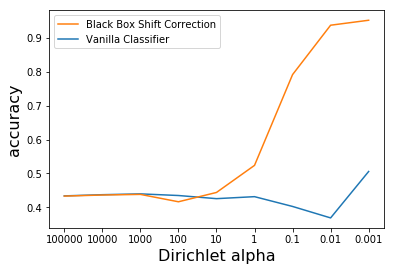

In [22]:
vanilla = plt.plot( label_p_unweighted.mean(axis=0), label='Vanilla Classifier' )
bbls = plt.plot(label_p_weighted.mean(axis=0), label='Black Box Shift Correction')
plt.xlabel("Dirichlet alpha", fontsize=16)  
plt.ylabel("accuracy", fontsize=16)  
plt.legend(handles=[bbls[0], vanilla[0]])

x = np.array(range(len(alpha_range)))
plt.xticks(x, alpha_range)


plt.savefig("tweak-dirichlet.pdf", bbox_inches='tight')

In [11]:
results_dict['0.001_19']

{'acc_unweighted': 0.51230466,
 'acc_weighted': 0.99121094,
 'kl_div': array([ inf]),
 'wt': array([[  1.10955748e+01],
        [  1.02111502e-01],
        [ -9.63767097e-03],
        [  3.12469546e-02],
        [  1.60188628e-01],
        [ -3.74789991e-01],
        [ -2.18023862e-02],
        [  5.85958669e-02],
        [ -3.68047790e-01],
        [ -7.11734484e-01]]),
 'wt_l2': 0.021206919640499696,
 'wt_true': array([[ 9.96346729],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 'ypred_s': array([ 6.,  6.,  9., ...,  0.,  2.,  7.], dtype=float32),
 'ypred_s_soft': array([[  3.08349151e-02,   7.10793361e-02,   6.12822548e-03, ...,
           1.56993903e-02,   6.37509293e-05,   4.49526217e-03],
        [  5.30796731e-03,   1.25655939e-03,   9.69273911e-04, ...,
           1.84787624e-02,   4.86511271e-04,   1.31483108e-01],
